#                                      Decoding Asteroids
# Machine Learning Approaches to Predicting Hazards and its Properties


![Alt text](https://c02.purpledshub.com/uploads/sites/41/2023/08/GettyImages_1367201304.jpg?w=750&webp=1)

# Asteroids - NeoWs

NeoWs (Near Earth Object Web Service) is a RESTful web service providing information about near-earth Asteroids. With NeoWs, users can perform the following tasks:

1. **Search for Asteroids by Closest Approach Date:**
   - Retrieve information about Asteroids based on their closest approach date to Earth.

2. **Lookup a Specific Asteroid:**
   - Obtain details about a particular Asteroid using its NASA JPL small body ID.

3. **Browse the Overall Data-Set:**
   - Explore the comprehensive data-set of near-earth Asteroids.

For more information and to access the NeoWs API, visit the [NeoWs API Documentation](https://api.nasa.gov/neo/rest/v1/).

To interact with the NeoWs API, you may need an API key from NASA. You can obtain a key by registering at the [NASA API Portal](https://api.nasa.gov/).

You can download the dataset from the link below:
https://drive.google.com/file/d/1ITLXR10S-crYsRe60AD6bnNuRKlu89_l/view?usp=sharing

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

### Description of data

In [63]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("asteroids.csv")

# display dataset and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17476 entries, 0 to 17475
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              17476 non-null  int64  
 1   Name                          17476 non-null  object 
 2   Absolute Magnitude            17476 non-null  float64
 3   Est Dia in KM(min)            17476 non-null  float64
 4   Est Dia in KM(max)            17476 non-null  float64
 5   Est Dia in M(min)             17476 non-null  float64
 6   Est Dia in M(max)             17476 non-null  float64
 7   Est Dia in Miles(min)         17476 non-null  float64
 8   Est Dia in Miles(max)         17476 non-null  float64
 9   Est Dia in Feet(min)          17476 non-null  float64
 10  Est Dia in Feet(max)          17476 non-null  float64
 11  Close Approach Date           17476 non-null  object 
 12  Epoch Date Close Approach     17476 non-null  int64  
 13  R

### Over look of data set and its values

In [64]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainty,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,2154652,154652 (2004 EP20),18.92,0.437074,0.977327,0.000437,0.000977,0.703383,1.572813,0.000133,0.000298,1995-01-07,789467580000,16.142863,58114.308162,36109.971091,0.242085,94.171161,3.621544e+07,2.250323e+07,Earth,151,2023-03-01 06:20:40,0,0.235633,5.689,2460200.5,0.450564,1.058480,16.175350,159.581464,397.761086,0.581567,191.347330,1.535392,2.460002e+06,179.331821,0.905066,J2000,False
1,3153509,(2003 HM),22.04,0.103886,0.232295,0.000104,0.000232,0.167183,0.373832,0.000032,0.000071,1995-01-07,789491340000,12.351057,44463.805374,27628.079511,0.481897,187.458071,7.209082e+07,4.479516e+07,Earth,43,2023-03-01 05:59:35,0,0.005791,7.079,2460200.5,0.269909,0.813511,26.274891,30.452820,268.005535,0.593937,19.321036,1.033085,2.460145e+06,74.589063,1.343256,J2000,True
2,3516633,(2010 HA),23.90,0.044112,0.098637,0.000044,0.000099,0.070989,0.158737,0.000013,0.000030,1995-01-07,789446160000,6.220732,22394.636864,13915.156445,0.197817,76.950847,2.959301e+07,1.838825e+07,Earth,17,2021-04-15 03:43:44,3,0.033189,6.264,2460200.5,0.195681,0.959556,2.183114,251.257621,343.323731,0.771789,185.760753,1.147322,2.460350e+06,203.453042,1.048573,J2000,False
3,3837644,(2019 AY3),23.82,0.045767,0.102339,0.000046,0.000102,0.073653,0.164694,0.000014,0.000031,1995-01-07,789504360000,22.411064,80679.829203,50131.308318,0.127634,49.649558,1.909375e+07,1.186431e+07,Earth,9,2023-01-16 04:52:17,0,0.018672,5.079,2460200.5,0.576978,1.212136,3.964751,266.129082,487.444887,0.512760,88.010827,1.911512,2.460383e+06,225.203615,0.738545,J2000,False
4,3843493,(2019 PY),25.30,0.023150,0.051765,0.000023,0.000052,0.037256,0.083306,0.000007,0.000016,1995-01-07,789446640000,4.998845,17995.842471,11181.916673,0.096301,37.461275,1.440650e+07,8.951782e+06,Earth,14,2021-04-15 21:32:40,2,0.045561,5.812,2460200.5,0.057446,1.057926,6.891433,303.638766,397.448715,0.997152,109.330892,1.118699,2.460394e+06,184.381786,0.905777,J2000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,54330036,(2022 WL7),23.02,0.066154,0.147924,0.000066,0.000148,0.106461,0.238055,0.000020,0.000045,2022-12-28,1672269540000,9.775796,35192.864963,21867.477677,0.131984,51.341661,1.974448e+07,1.226865e+07,Earth,11,2023-01-25 04:53:11,5,0.122809,4.199,2460200.5,0.327498,1.633620,16.672305,273.279488,762.649483,1.098612,196.966994,2.168628,2.459953e+06,116.674983,0.472039,J2000,False
17472,54336643,(2022 YM4),23.98,0.042516,0.095069,0.000043,0.000095,0.068421,0.152995,0.000013,0.000029,2022-12-28,1672199340000,12.269783,44171.220410,27446.278593,0.115776,45.036729,1.731979e+07,1.076202e+07,Earth,6,2023-01-15 05:25:31,7,0.092227,5.216,2460200.5,0.146745,1.201126,21.582880,272.578603,480.818640,1.024867,233.449218,1.377385,2.459988e+06,159.125584,0.748723,J2000,False
17473,54336907,(2022 YK5),23.83,0.045557,0.101869,0.000046,0.000102,0.073315,0.163937,0.000014,0.000031,2022-12-28,1672235100000,5.807476,20906.914632,12990.743706,0.085148,33.122458,1.273792e+07,7.914974e+06,Earth,13,2023-01-21 04:53:58,6,0.054318,6.470,2460200.5,0.154055,0.921034,9.330658,104.046221,322.858237,0.779144,156.218842,1.062924,2.460086e+06,127.265813,1.115040,J2000,False
17474,54336912,(2022 YR5),25.

In [4]:
df.describe()

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainty,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,1.747600e+04,17476.000000,17476.000000,17476.000000,1.747600e+04,17476.000000,17476.000000,17476.000000,1.747600e+04,1.747600e+04,1.747600e+04,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,1.747600e+04,1.747600e+04,17476.000000,17476.000000,17476.000000,17476.000000,1.747600e+04,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,17476.000000,1.747600e+04,17476.000000,17476.000000
mean,1.793006e+07,23.553552,0.125316,0.280214,1.253157e-04,0.000280,0.201671,0.450949,3.819622e-05,8.540934e-05,1.297781e+12,13.528715,48703.372725,30262.381791,0.257094,100.009551,3.846071e+07,2.389838e+07,23.480774,4.128691,0.067454,5.160731,2.459890e+06,0.362980,1.355376,12.366788,172.848032,603.880484,0.814282,183.981510,1.896470,2.459891e+06,178.741536,0.763906
std,2.294960e+07,2.889889,0.247754,0.553996,2.477544e-04,0.000554,0.398711,0.891545,7.551554e-05,1.688579e-04,2.541522e+11,7.061643,25421.915038,15796.189375,0.147687,57.450406,2.209372e+07,1.372840e+07,46.628676,3.127355,0.082322,1.222038,1.084593e+03,0.178387,0.496081,10.340599,103.952290,347.462402,0.232922,103.851277,0.906551,1.103120e+03,108.375252,0.341112
min,2.001620e+06,12.550000,0.000683,0.001528,6.832112e-07,0.000002,0.001099,0.002459,2.082428e-07,4.656450e-07,7.894462e+11,0.225199,810.717258,503.748176,0.000086,0.033578,1.291314e+04,8.023852e+03,1.000000,0.000000,0.000002,1.673000,2.449752e+06,0.004034,0.461711,0.012015,0.012520,114.591947,0.080241,0.016152,0.653754,2.449738e+06,0.054065,0.072578
25%,3.479014e+06,21.370000,0.019256,0.043057,1.925551e-05,0.000043,0.030988,0.069291,5.869079e-06,1.312366e-05,1.088344e+12,8.142594,29313.338639,18214.168667,0.130692,50.839150,1.955123e+07,1.214857e+07,6.000000,0.000000,0.009037,4.227000,2.460200e+06,0.223935,0.990253,4.687999,81.353416,359.929964,0.642719,93.799272,1.242454,2.460023e+06,82.444681,0.492379
50%,3.763628e+06,23.710000,0.048145,0.107656,4.814542e-05,0.000108,0.077480,0.173251,1.467472e-05,3.281368e-05,1.332182e+12,12.474815,44909.332240,27904.912580,0.265472,103.268650,3.971406e+07,2.467717e+07,11.000000,5.000000,0.032932,5.181500,2.460200e+06,0.339586,1.208274,9.337852,173.482695,485.117145,0.840739,189.819590,1.540216,2.460172e+06,180.098839,0.742089
75%,5.405129e+07,25.700000,0.141434,0.316257,1.414344e-04,0.000316,0.227610,0.508952,4.310920e-05,9.639510e-05,1.522330e+12,17.699667,63718.800169,39592.384472,0.386127,150.203561,5.776384e+07,3.589278e+07,22.000000,7.000000,0.096157,6.064250,2.460200e+06,0.484278,1.588314,17.673414,255.287394,731.143791,0.995205,273.503471,2.267171,2.460305e+06,272.952075,1.000195
max,5.437665e+07,32.950000,8.214005,18.367074,8.214005e-03,0.018367,13.218799,29.558132,2.503629e-03,5.598284e-03,1.672271e+12,52.439982,188783.936221,117302.996370,0.499961,194.484943,7.479314e+07,4.647430e+07,1251.000000,9.000000,0.497037,11.625000,2.460200e+06,0.968612,5.692025,75.623603,359.965322,4960.194144,1.299962,359.991026,10.096334,2.461125e+06,359.962278,3.141582


In [5]:
#to check how many null values are in each column
np.sum(df.isna())


Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainty               0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

Threre are no null values in the data set

In [6]:
# Find duplicates in the DataFrame
duplicates = df[df.duplicated()]

# Get the number of duplicates
num_duplicates = len(duplicates)

print("Number of duplicates:", num_duplicates)

Number of duplicates: 1618


In [7]:
# Remove duplicates from the DataFrame
df= df.drop_duplicates()

In [8]:
#Continuous Features
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print("\nContinuous features:")
print(continuous_features)

# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical features:")
print(categorical_features)


Continuous features:
Index(['Neo Reference ID', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainty', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')

Categorical features:
Index(['Name', 'Close Approach Date', 'Orbiting Body',
       'Orbit Determination Date', 'Equino

Neo Reference ID, Epoch Date Close Approach, Orbit ID are categorical nominal values.

In [9]:
# As Hazardous is the Target variable we need to convert it into numberic value
df['Hazardous'] = df['Hazardous'].astype('int64')

In [10]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainty,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,2154652,154652 (2004 EP20),18.92,0.437074,0.977327,0.000437,0.000977,0.703383,1.572813,0.000133,0.000298,1995-01-07,789467580000,16.142863,58114.308162,36109.971091,0.242085,94.171161,3.621544e+07,2.250323e+07,Earth,151,2023-03-01 06:20:40,0,0.235633,5.689,2460200.5,0.450564,1.058480,16.175350,159.581464,397.761086,0.581567,191.347330,1.535392,2.460002e+06,179.331821,0.905066,J2000,0
1,3153509,(2003 HM),22.04,0.103886,0.232295,0.000104,0.000232,0.167183,0.373832,0.000032,0.000071,1995-01-07,789491340000,12.351057,44463.805374,27628.079511,0.481897,187.458071,7.209082e+07,4.479516e+07,Earth,43,2023-03-01 05:59:35,0,0.005791,7.079,2460200.5,0.269909,0.813511,26.274891,30.452820,268.005535,0.593937,19.321036,1.033085,2.460145e+06,74.589063,1.343256,J2000,1
2,3516633,(2010 HA),23.90,0.044112,0.098637,0.000044,0.000099,0.070989,0.158737,0.000013,0.000030,1995-01-07,789446160000,6.220732,22394.636864,13915.156445,0.197817,76.950847,2.959301e+07,1.838825e+07,Earth,17,2021-04-15 03:43:44,3,0.033189,6.264,2460200.5,0.195681,0.959556,2.183114,251.257621,343.323731,0.771789,185.760753,1.147322,2.460350e+06,203.453042,1.048573,J2000,0
3,3837644,(2019 AY3),23.82,0.045767,0.102339,0.000046,0.000102,0.073653,0.164694,0.000014,0.000031,1995-01-07,789504360000,22.411064,80679.829203,50131.308318,0.127634,49.649558,1.909375e+07,1.186431e+07,Earth,9,2023-01-16 04:52:17,0,0.018672,5.079,2460200.5,0.576978,1.212136,3.964751,266.129082,487.444887,0.512760,88.010827,1.911512,2.460383e+06,225.203615,0.738545,J2000,0
4,3843493,(2019 PY),25.30,0.023150,0.051765,0.000023,0.000052,0.037256,0.083306,0.000007,0.000016,1995-01-07,789446640000,4.998845,17995.842471,11181.916673,0.096301,37.461275,1.440650e+07,8.951782e+06,Earth,14,2021-04-15 21:32:40,2,0.045561,5.812,2460200.5,0.057446,1.057926,6.891433,303.638766,397.448715,0.997152,109.330892,1.118699,2.460394e+06,184.381786,0.905777,J2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,54330036,(2022 WL7),23.02,0.066154,0.147924,0.000066,0.000148,0.106461,0.238055,0.000020,0.000045,2022-12-28,1672269540000,9.775796,35192.864963,21867.477677,0.131984,51.341661,1.974448e+07,1.226865e+07,Earth,11,2023-01-25 04:53:11,5,0.122809,4.199,2460200.5,0.327498,1.633620,16.672305,273.279488,762.649483,1.098612,196.966994,2.168628,2.459953e+06,116.674983,0.472039,J2000,0
17472,54336643,(2022 YM4),23.98,0.042516,0.095069,0.000043,0.000095,0.068421,0.152995,0.000013,0.000029,2022-12-28,1672199340000,12.269783,44171.220410,27446.278593,0.115776,45.036729,1.731979e+07,1.076202e+07,Earth,6,2023-01-15 05:25:31,7,0.092227,5.216,2460200.5,0.146745,1.201126,21.582880,272.578603,480.818640,1.024867,233.449218,1.377385,2.459988e+06,159.125584,0.748723,J2000,0
17473,54336907,(2022 YK5),23.83,0.045557,0.101869,0.000046,0.000102,0.073315,0.163937,0.000014,0.000031,2022-12-28,1672235100000,5.807476,20906.914632,12990.743706,0.085148,33.122458,1.273792e+07,7.914974e+06,Earth,13,2023-01-21 04:53:58,6,0.054318,6.470,2460200.5,0.154055,0.921034,9.330658,104.046221,322.858237,0.779144,156.218842,1.062924,2.460086e+06,127.265813,1.115040,J2000,0
17474,54336912,(2022 YR5),25.12,0.025151,0.056239,0.000025,0

In [11]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 15858
Number of columns: 40


### Visually representing the asteroids in the orbit

**Orbit:**
- An orbit is the curved path followed by an object as it revolves around another object, called the central mass or gravitational center. Orbits are governed by the gravitational attraction between the two objects, according to Kepler's laws of planetary motion and Newton's law of universal gravitation.
- **Central Body**: The object around which another object orbits. For example, the Sun is the central body for planets in our solar system.



- The Orbit ID serves as a reference number or code that uniquely identifies a specific orbit. It aids astronomers, researchers, and space agencies in tracking and studying the trajectory of individual asteroids

- The Below violin Plot is to to show the distribution of Hazardous and Non-Hazardous asteroids across different Orbit IDs

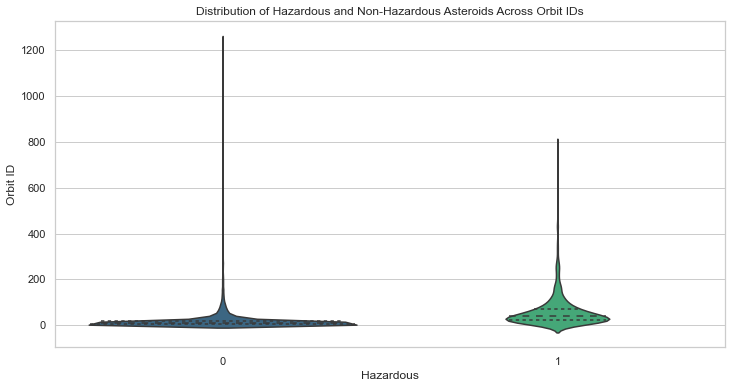

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a violin plot to show the distribution of Hazardous and Non-Hazardous asteroids across different Orbit IDs
plt.figure(figsize=(12, 6))
sns.violinplot(x='Hazardous', y='Orbit ID', data=df, inner='quartile', palette='viridis')
plt.title('Distribution of Hazardous and Non-Hazardous Asteroids Across Orbit IDs')
plt.xlabel('Hazardous')
plt.ylabel('Orbit ID')
plt.show()


In [13]:
orbit_groups = df.groupby('Orbit ID').agg({'Absolute Magnitude': 'mean', 'Est Dia in KM(min)': 'mean', 'Perihelion Distance': 'mean', 'Eccentricity': 'mean', 'Inclination': 'mean'})


**Absolute Magnitude**:
- Absolute magnitude is the measure of the luminosity or intrinsic brightness of a celestial object, assuming it is located at a standard distance of 10 parsecs (32.6 light-years) from the observer. This standardization allows astronomers to compare the true brightness of different objects without the distortion introduced by their varying distances.


The below box plot visually represents the distribution of absolute magnitudes for different orbit IDs.

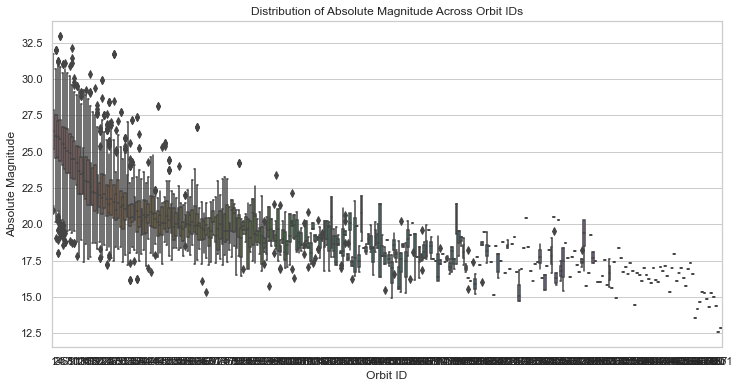

In [62]:
# Example using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Orbit ID', y='Absolute Magnitude', data=df)
plt.title('Distribution of Absolute Magnitude Across Orbit IDs')
plt.xlabel('Orbit ID')
plt.ylabel('Absolute Magnitude')
plt.show()


- Each box in the plot represents the interquartile range (IQR) of absolute magnitudes for a specific orbit ID.
- The line inside the box represents the median absolute magnitude for each orbit ID.
- Outliers beyond the whiskers may indicate extreme values in the absolute magnitudes.
- As we can observe something interesting as we are moving away from orbit the absolute magnitude is decreasing.

**Estimated Diameter**
- (Est Dia) refers to the calculated or estimated size of a celestial object, such as an asteroid or a planet. It is often expressed in units like kilometers for asteroids. The estimation is typically based on observations

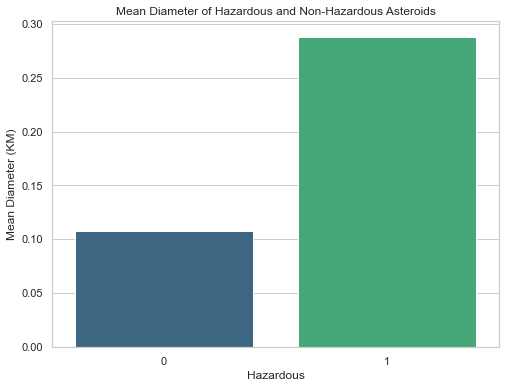

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean diameter for hazardous and non-hazardous asteroids
mean_diameter_by_hazardous = df.groupby('Hazardous')['Est Dia in KM(min)'].mean()

# Plot the mean diameter for hazardous and non-hazardous asteroids
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_diameter_by_hazardous.index, y=mean_diameter_by_hazardous.values, palette='viridis')
plt.title('Mean Diameter of Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Mean Diameter (KM)')
plt.show()


- We can see that the hazardous asteroids have more diameter than the non-hazardous or this might be due to outliers. However, we are not removing outliers because in this astronomical data Rare Celestial Events may ocuur.
- Rare Celestial Events: Astronomy deals with a vast and diverse universe where rare events, such as supernovae or unusual astronomical phenomena, can occur. These events might be outliers in the data but are scientifically valuable.

### Relative Velocity Definition

**Relative velocity**, often denoted as $$(v_{\text{rel}})$$, is the measure of the velocity of one object as observed from the reference frame of another object. It describes how fast one object is moving with respect to another. The relative velocity takes into account both the magnitude and direction of the velocities of the two objects. In the context of astronomical or physical observations, it is common to express relative velocity in units such as kilometers per second (km/s).

#### Components of the Definition:

- **Magnitude:** Relative velocity is a scalar quantity that represents the speed at which one object is moving relative to another. It tells us how fast the distance between the two objects is changing.

- **Direction:** Relative velocity is a vector quantity because it includes information about the direction of motion. It indicates not only how fast the objects are moving relative to each other but also in what direction.

#### Formulas:

If v_A is the velocity of object A and v_B is the velocity of object B, then the relative velocity (v_rel) of object A with respect to object B is given by:

v_rel = v_A - v_B
Alternatively, if you want the relative velocity of object B with respect to object A, it would be:

v_rel = v_B - v_A

In astronomy, relative velocity is crucial for understanding the motions of celestial bodies, such as planets, stars, or galaxies, with respect to each other. It helps astronomers calculate trajectories, predict encounters, and study the dynamics of astronomical systems.


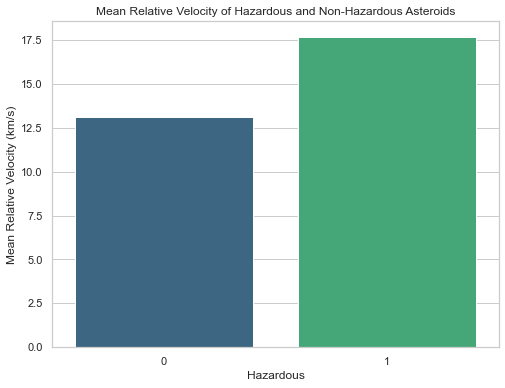

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean relative velocity for hazardous and non-hazardous asteroids
mean_velocity_by_hazardous = df.groupby('Hazardous')['Relative Velocity km per sec'].mean()

# Plot the mean relative velocity for hazardous and non-hazardous asteroids
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_velocity_by_hazardous.index, y=mean_velocity_by_hazardous.values, palette='viridis')
plt.title('Mean Relative Velocity of Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Mean Relative Velocity (km/s)')
plt.show()


We can observe same as the diameter in the velocity case.

## What is the Nature of Classification Problem?

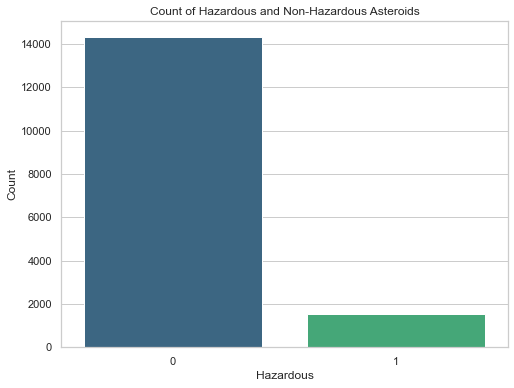

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Hazardous', data=df, palette='viridis')

plt.title('Count of Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()


## We are clearly dealing with Unbalanced data, its obvious because most of the asteroids are not Hazardous to earth.

In [65]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainty,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,2154652,154652 (2004 EP20),18.92,0.437074,0.977327,0.000437,0.000977,0.703383,1.572813,0.000133,0.000298,1995-01-07,789467580000,16.142863,58114.308162,36109.971091,0.242085,94.171161,3.621544e+07,2.250323e+07,Earth,151,2023-03-01 06:20:40,0,0.235633,5.689,2460200.5,0.450564,1.058480,16.175350,159.581464,397.761086,0.581567,191.347330,1.535392,2.460002e+06,179.331821,0.905066,J2000,False
1,3153509,(2003 HM),22.04,0.103886,0.232295,0.000104,0.000232,0.167183,0.373832,0.000032,0.000071,1995-01-07,789491340000,12.351057,44463.805374,27628.079511,0.481897,187.458071,7.209082e+07,4.479516e+07,Earth,43,2023-03-01 05:59:35,0,0.005791,7.079,2460200.5,0.269909,0.813511,26.274891,30.452820,268.005535,0.593937,19.321036,1.033085,2.460145e+06,74.589063,1.343256,J2000,True
2,3516633,(2010 HA),23.90,0.044112,0.098637,0.000044,0.000099,0.070989,0.158737,0.000013,0.000030,1995-01-07,789446160000,6.220732,22394.636864,13915.156445,0.197817,76.950847,2.959301e+07,1.838825e+07,Earth,17,2021-04-15 03:43:44,3,0.033189,6.264,2460200.5,0.195681,0.959556,2.183114,251.257621,343.323731,0.771789,185.760753,1.147322,2.460350e+06,203.453042,1.048573,J2000,False
3,3837644,(2019 AY3),23.82,0.045767,0.102339,0.000046,0.000102,0.073653,0.164694,0.000014,0.000031,1995-01-07,789504360000,22.411064,80679.829203,50131.308318,0.127634,49.649558,1.909375e+07,1.186431e+07,Earth,9,2023-01-16 04:52:17,0,0.018672,5.079,2460200.5,0.576978,1.212136,3.964751,266.129082,487.444887,0.512760,88.010827,1.911512,2.460383e+06,225.203615,0.738545,J2000,False
4,3843493,(2019 PY),25.30,0.023150,0.051765,0.000023,0.000052,0.037256,0.083306,0.000007,0.000016,1995-01-07,789446640000,4.998845,17995.842471,11181.916673,0.096301,37.461275,1.440650e+07,8.951782e+06,Earth,14,2021-04-15 21:32:40,2,0.045561,5.812,2460200.5,0.057446,1.057926,6.891433,303.638766,397.448715,0.997152,109.330892,1.118699,2.460394e+06,184.381786,0.905777,J2000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,54330036,(2022 WL7),23.02,0.066154,0.147924,0.000066,0.000148,0.106461,0.238055,0.000020,0.000045,2022-12-28,1672269540000,9.775796,35192.864963,21867.477677,0.131984,51.341661,1.974448e+07,1.226865e+07,Earth,11,2023-01-25 04:53:11,5,0.122809,4.199,2460200.5,0.327498,1.633620,16.672305,273.279488,762.649483,1.098612,196.966994,2.168628,2.459953e+06,116.674983,0.472039,J2000,False
17472,54336643,(2022 YM4),23.98,0.042516,0.095069,0.000043,0.000095,0.068421,0.152995,0.000013,0.000029,2022-12-28,1672199340000,12.269783,44171.220410,27446.278593,0.115776,45.036729,1.731979e+07,1.076202e+07,Earth,6,2023-01-15 05:25:31,7,0.092227,5.216,2460200.5,0.146745,1.201126,21.582880,272.578603,480.818640,1.024867,233.449218,1.377385,2.459988e+06,159.125584,0.748723,J2000,False
17473,54336907,(2022 YK5),23.83,0.045557,0.101869,0.000046,0.000102,0.073315,0.163937,0.000014,0.000031,2022-12-28,1672235100000,5.807476,20906.914632,12990.743706,0.085148,33.122458,1.273792e+07,7.914974e+06,Earth,13,2023-01-21 04:53:58,6,0.054318,6.470,2460200.5,0.154055,0.921034,9.330658,104.046221,322.858237,0.779144,156.218842,1.062924,2.460086e+06,127.265813,1.115040,J2000,False
17474,54336912,(2022 YR5),25.

In the above data you can see that we have Est Dia in KM(min), Est Dia in KM(max). Let us check are they related.

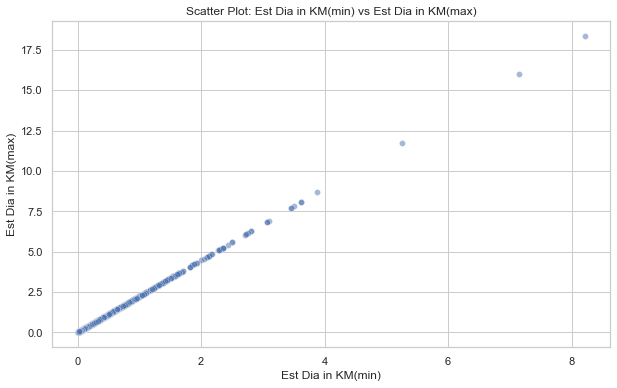

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='Est Dia in KM(min)', y='Est Dia in KM(max)', data=df, alpha=0.5)

plt.title('Scatter Plot: Est Dia in KM(min) vs Est Dia in KM(max)')
plt.xlabel('Est Dia in KM(min)')
plt.ylabel('Est Dia in KM(max)')

plt.show()


We can see they are completely overlapping. So we can remove one of them.

### There are so many orbital features lets seperate them to see if some of them are correlated and lets remove redudancy.

In [20]:
import pandas as pd

orbital_features = df[['Semi Major Axis', 'Inclination', 'Eccentricity', 'Orbit ID', 'Perihelion Distance', 'Aphelion Dist','Orbital Period','Mean Motion']]

# Calculate the correlation matrix
correlation_matrix = orbital_features.corr()

print(correlation_matrix)


                     Semi Major Axis  Inclination  Eccentricity  Orbit ID  \
Semi Major Axis             1.000000    -0.010922      0.552599  0.041147   
Inclination                -0.010922     1.000000      0.028337  0.135086   
Eccentricity                0.552599     0.028337      1.000000  0.121116   
Orbit ID                    0.041147     0.135086      0.121116  1.000000   
Perihelion Distance         0.470180    -0.023232     -0.427174 -0.057987   
Aphelion Dist               0.973795    -0.005973      0.715148  0.059997   
Orbital Period              0.995322    -0.012803      0.563059  0.039599   
Mean Motion                -0.896180    -0.006372     -0.383768 -0.037106   

                     Perihelion Distance  Aphelion Dist  Orbital Period  \
Semi Major Axis                 0.470180       0.973795        0.995322   
Inclination                    -0.023232      -0.005973       -0.012803   
Eccentricity                   -0.427174       0.715148        0.563059   
Orbit 

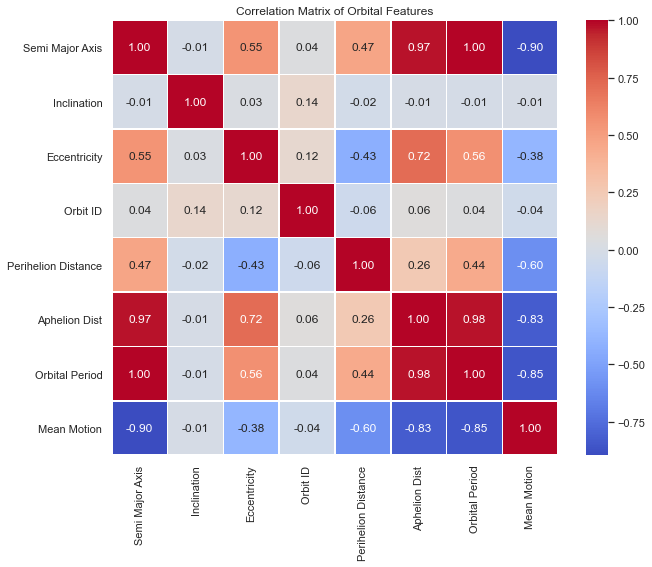

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Orbital Features')
plt.show()


In [22]:
df1=df.copy() 

In [23]:
#Observing Unique Values in Orbiting Body and Equinox

df1['Equinox'].value_counts()

J2000    15858
Name: Equinox, dtype: int64

In [24]:
df1['Orbiting Body'].value_counts()

Earth    15858
Name: Orbiting Body, dtype: int64

In [25]:
df1 = df1.drop(['Orbiting Body', 'Equinox'], axis = 1)

<AxesSubplot:>

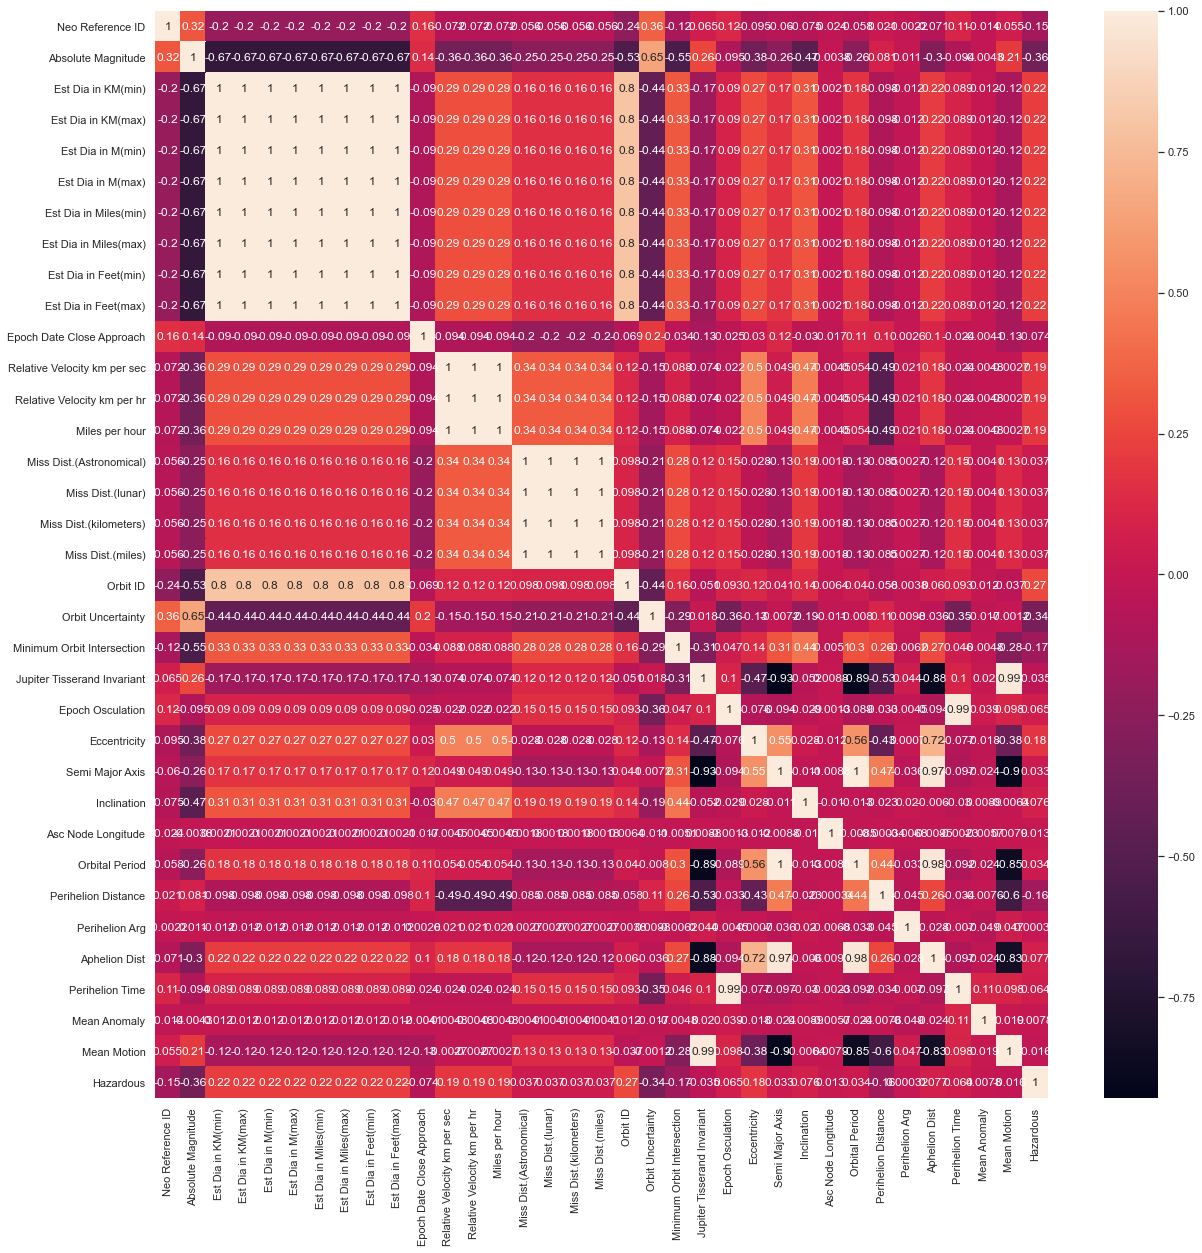

In [26]:
#Heatmap of Correlation

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

As we can see from above there are some same values but in diffrent units, so, lets remove them.

In [27]:
#Many Columns are there which have correlation 1 because they are identical columns with a different unit. So, can be dropped.

df1 = df1.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)','Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)


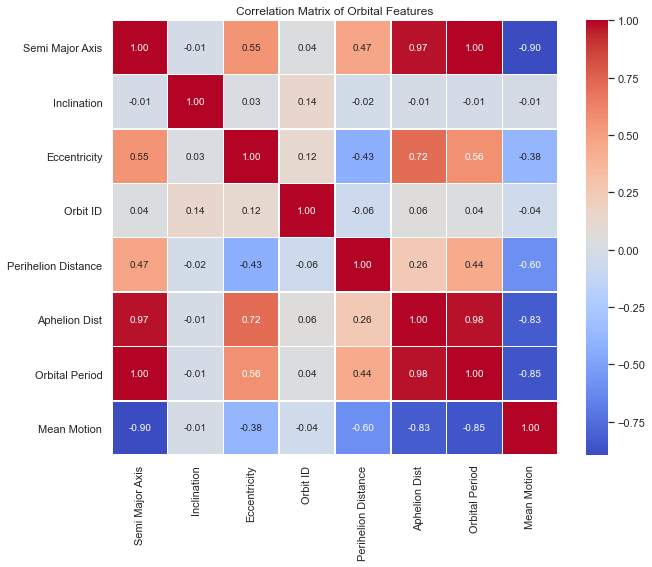

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Orbital Features')
plt.show()


In [28]:
df1=df1.drop('Orbit Determination Date', axis=1) # As it is not significant, drop it

In [29]:
df1=df1.drop('Neo Reference ID', axis=1) #not needed

In [30]:
df1 = df1.drop('Jupiter Tisserand Invariant', axis=1)
#the Jupiter Tisserand Invariant, often referred to as the Tisserand parameter or Tisserand's parameter with respect to Jupiter, is a numerical value used in celestial mechanics to classify the orbits of objects in the solar system

In [31]:
df1 = df1.drop('Orbital Period', axis=1)
#Orital period and semi major axis are directly related

Follow Kepler's Third Law :
Kepler's Third Law of Planetary Motion, which relates the orbital period (T) and semi-major axis (a) of a planet or other celestial body orbiting the Sun. To restate:

Kepler's Third Law:
The square of the orbital period (T2) is directly proportional to the cube of the semi-major axis (a3).

This can be expressed mathematically as:

T2 ∝ a3

In [32]:
df1 = df1.drop('Mean Motion', axis=1)


Relationship:
The two quantities are inversely related:
Mean Motion = 360 / Orbital Period

In [ ]:
df1=df1.drop(['Perihelion Time','Epoch Osculation'],axis=1)

# by defination itself we can say those aren't required

**Epoch Osculation:

As mentioned earlier, "Epoch Osculation" refers to the epoch at which the osculating elements of an orbit are determined. It's the specific moment in time used as a reference point for calculating the orbital parameters of an asteroid. The term "osculating" implies that these elements describe the orbit as it would be at that particular moment.
Perihelion Time:

**"Perihelion Time"**
specifically refers to the time when an asteroid (or any celestial body in orbit around the Sun) is at its closest distance to the Sun, known as perihelion. Perihelion is the point in the orbit where the object is closest to the Sun. The perihelion time is usually given as a date and time.

In [34]:
df1 = df1.drop('Aphelion Dist', axis=1)

We can relate the semi-major axis (a), aphelion distance (ra), and eccentricity (e) as:

ra = a(1 + e)

Where:

a = Semi-major axis length
ra = Aphelion distance
e = Eccentricity lies in between 0 to 1

considering the correlation matrix above we can eliminate Aphelion Dist.

In [35]:
df1 = df1.drop('Epoch Date Close Approach', axis=1)# Date is not important

In [36]:
df1 = df1.drop('Name', axis=1)

In [37]:
df1 = df1.drop('Close Approach Date', axis=1) # Date is not important

In [38]:
df1 = df1.drop('Orbit ID', axis=1) # A unique identifier for the asteroid's orbital path

<AxesSubplot:>

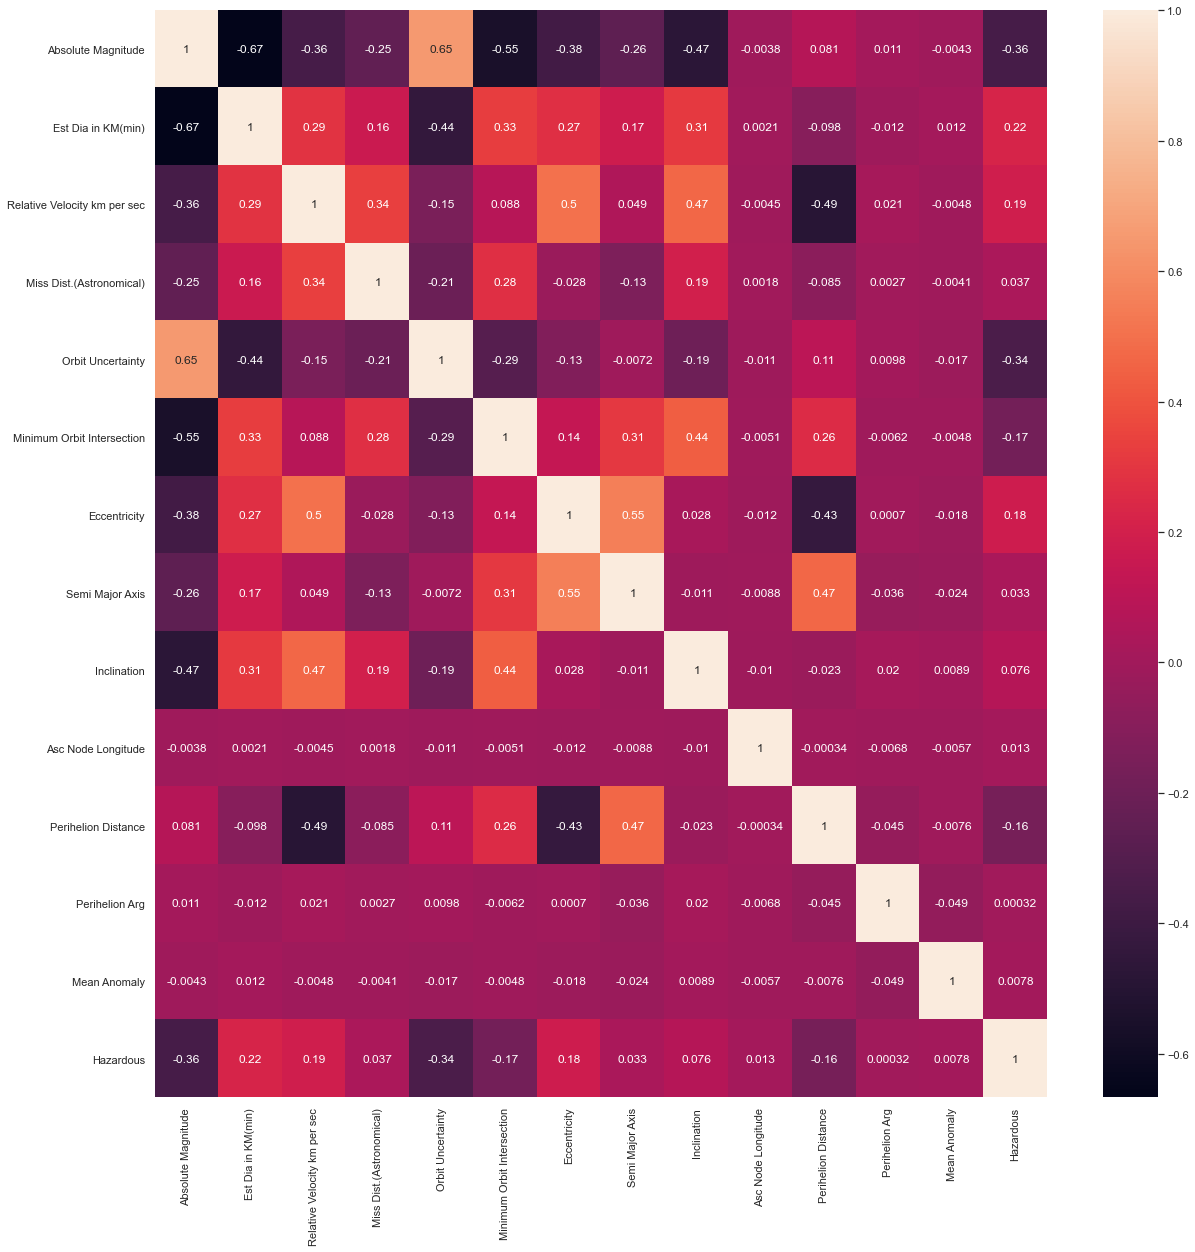

In [39]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(),annot = True)

In [40]:
num_rows, num_columns = df1.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 15858
Number of columns: 14


## Just to see the number of outliers

In [41]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Create a DataFrame to store the outlier counts
outlier_counts = df1.apply(count_outliers)

# Display the number of outliers in each column
print(outlier_counts)

Absolute Magnitude                14
Est Dia in KM(min)              1398
Relative Velocity km per sec     268
Miss Dist.(Astronomical)           0
Orbit Uncertainty                  0
Minimum Orbit Intersection      1098
Eccentricity                      55
Semi Major Axis                  643
Inclination                      453
Asc Node Longitude                 0
Perihelion Distance               12
Perihelion Arg                     0
Mean Anomaly                       0
Hazardous                       1526
dtype: int64


# Classification Problem : To Determine Whether an Asteroid is Hazardous or Not

In [43]:
X = df1.drop(['Hazardous'], axis = 1)
y = df1['Hazardous'].astype(int)

In [44]:
df1

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainty,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,18.92,0.437074,16.142863,0.242085,0,0.235633,0.450564,1.058480,16.175350,159.581464,0.581567,191.347330,179.331821,0
1,22.04,0.103886,12.351057,0.481897,0,0.005791,0.269909,0.813511,26.274891,30.452820,0.593937,19.321036,74.589063,1
2,23.90,0.044112,6.220732,0.197817,3,0.033189,0.195681,0.959556,2.183114,251.257621,0.771789,185.760753,203.453042,0
3,23.82,0.045767,22.411064,0.127634,0,0.018672,0.576978,1.212136,3.964751,266.129082,0.512760,88.010827,225.203615,0
4,25.30,0.023150,4.998845,0.096301,2,0.045561,0.057446,1.057926,6.891433,303.638766,0.997152,109.330892,184.381786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,23.02,0.066154,9.775796,0.131984,5,0.122809,0.327498,1.633620,16.672305,273.279488,1.098612,196.966994,116.674983,0
17472,23.98,0.042516,12.269783,0.115776,7,0.092227,0.146745,1.201126,21.582880,272.578603,1.024867,233.449218,159.125584,0
17473,23.83,0.045557,5.807476,0.085148,6,0.054318,0.154055,0.921034,9.330658,104.046221,0.779144,156.218842,127.265813,0
17474,25.12,0.025151,17.632885,0.074527,8,0.050481,0.398112,1.061900,28.435702,91.555474,0.639145,112.323245,294.165138,0


Finally we are with 14 columns and 15858 rows

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Logistic Regression

Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11483
           1       0.52      0.19      0.28      1203

    accuracy                           0.91     12686
   macro avg       0.72      0.59      0.62     12686
weighted avg       0.88      0.91      0.89     12686


Test Confusion Matrix:
 [[11268   215]
 [  969   234]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2849
           1       0.45      0.14      0.21       323

    accuracy                           0.90      3172
   macro avg       0.68      0.56      0.58      3172
weighted avg       0.86      0.90      0.87      3172


Test Confusion Matrix:
 [[2794   55]
 [ 278   45]]


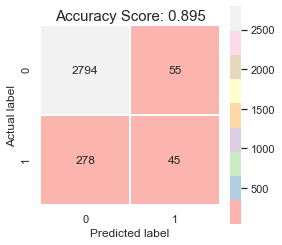

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=3)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the training data
train_y_pred = logistic_model.predict(X_train)

# Predict on the test data
test_y_pred = logistic_model.predict(X_test)

# Classification Report for Training Set
train_report = classification_report(y_train, train_y_pred)
print("Training Classification Report:\n", train_report)

train_conf_matrix = confusion_matrix(y_train, train_y_pred)
print("\nTest Confusion Matrix:\n", train_conf_matrix)

# Classification Report for Test Set
test_report = classification_report(y_test, test_y_pred)
print("\nTest Classification Report:\n", test_report)

test_conf_matrix = confusion_matrix(y_test, test_y_pred)
print("\nTest Confusion Matrix:\n", test_conf_matrix)

# Plotting Confusion Matrix for Test Set
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {round(accuracy_score(y_test, test_y_pred), 4)}'
plt.title(all_sample_title, size=15)
plt.show()


The performance of logistic regression not good though it is reasonably accurate but as this is unbalanced data if we check other metrics like f1 score we can see it doesn't do well. Our main focus is to get less False Positives (FP) because if the asteroid is hazardous and its predection is not hazardous, that is a big problem. So let us use bagging techniques.

# Desision Tree

Training Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      1.00      1.00      1203

    accuracy                           1.00     12686
   macro avg       1.00      1.00      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (Decision Tree):
[[11483     0]
 [    0  1203]]

Test Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       0.99      0.98      0.99       323

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (Decision Tree):
[[2847    2]
 [   6  317]]


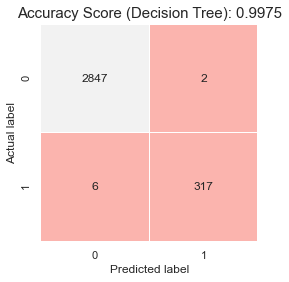

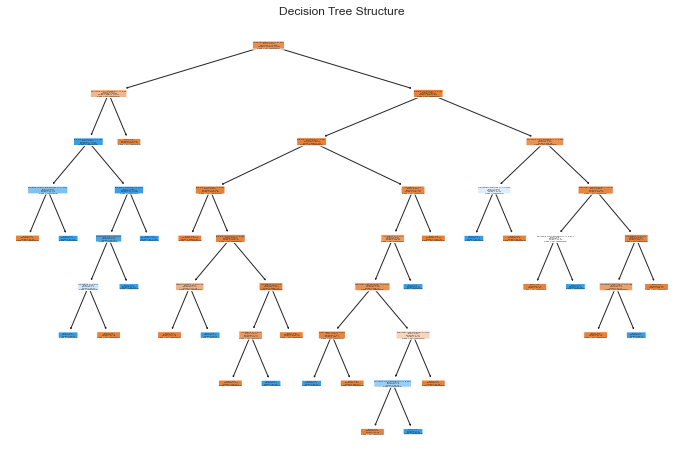

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=3)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the training data
train_y_pred_tree = tree_model.predict(X_train)

# Predict on the test data
test_y_pred_tree = tree_model.predict(X_test)

# Classification Report for Training Set
train_report_tree = classification_report(y_train, train_y_pred_tree)
print("Training Classification Report (Decision Tree):\n", train_report_tree)

# Confusion Matrix for Training Set
train_conf_matrix_tree = confusion_matrix(y_train, train_y_pred_tree)
print("\nTraining Confusion Matrix (Decision Tree):")
print(train_conf_matrix_tree)

# Classification Report for Test Set
test_report_tree = classification_report(y_test, test_y_pred_tree)
print("\nTest Classification Report (Decision Tree):\n", test_report_tree)

# Confusion Matrix for Test Set
test_conf_matrix_tree = confusion_matrix(y_test, test_y_pred_tree)
print("\nTest Confusion Matrix (Decision Tree):")
print(test_conf_matrix_tree)

# Plotting Confusion Matrix for Test Set (Decision Tree) without color legend
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_tree, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_tree = f'Accuracy Score (Decision Tree): {round(accuracy_score(y_test, test_y_pred_tree), 4)}'
plt.title(all_sample_title_tree, size=15)
plt.show()

# Plotting the Decision Tree structure
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Not Hazardous', 'Hazardous'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()


# Random Forest

Training Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      1.00      1.00      1203

    accuracy                           1.00     12686
   macro avg       1.00      1.00      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (Random Forest):
[[11483     0]
 [    0  1203]]

Test Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       1.00      0.99      0.99       323

    accuracy                           1.00      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (Random Forest):
[[2848    1]
 [   4  319]]


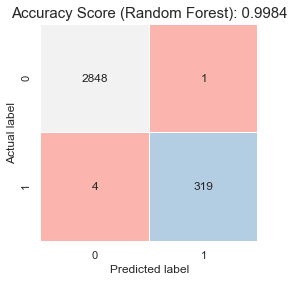

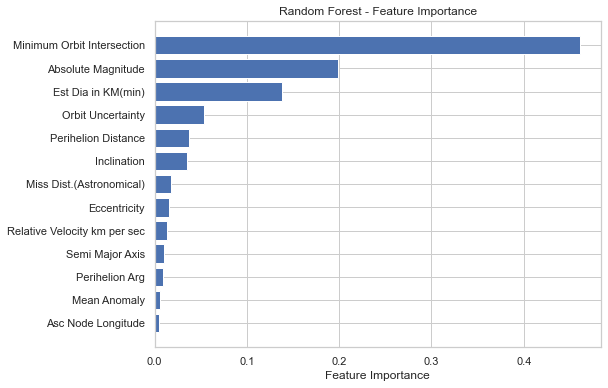

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=3)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training data
train_y_pred_rf = rf_model.predict(X_train)

# Predict on the test data
test_y_pred_rf = rf_model.predict(X_test)

# Classification Report for Training Set
train_report_rf = classification_report(y_train, train_y_pred_rf)
print("Training Classification Report (Random Forest):\n", train_report_rf)

# Confusion Matrix for Training Set
train_conf_matrix_rf = confusion_matrix(y_train, train_y_pred_rf)
print("\nTraining Confusion Matrix (Random Forest):")
print(train_conf_matrix_rf)

# Classification Report for Test Set
test_report_rf = classification_report(y_test, test_y_pred_rf)
print("\nTest Classification Report (Random Forest):\n", test_report_rf)

# Confusion Matrix for Test Set
test_conf_matrix_rf = confusion_matrix(y_test, test_y_pred_rf)
print("\nTest Confusion Matrix (Random Forest):")
print(test_conf_matrix_rf)

# Plotting Confusion Matrix for Test Set (Random Forest)
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_rf, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1',cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_rf = f'Accuracy Score (Random Forest): {round(accuracy_score(y_test, test_y_pred_rf), 4)}'
plt.title(all_sample_title_rf, size=15)
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()


## Adaptive Boost Classifier:

Training Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      1.00      1.00      1203

    accuracy                           1.00     12686
   macro avg       1.00      1.00      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (AdaBoost):
[[11483     0]
 [    0  1203]]

Test Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       0.99      0.98      0.99       323

    accuracy                           1.00      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (AdaBoost):
[[2846    3]
 [   6  317]]


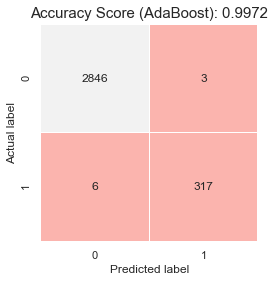

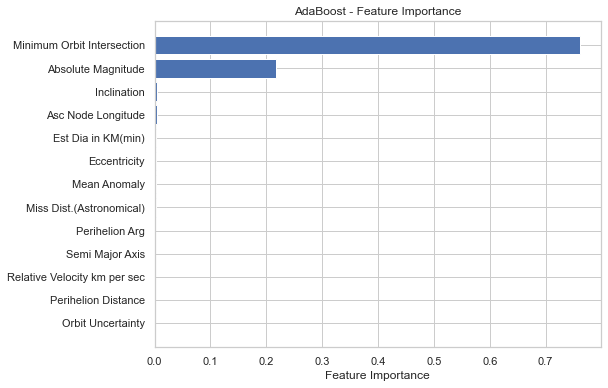

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost Classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the training data
train_y_pred_adaboost = adaboost_classifier.predict(X_train)

# Predict on the test data
test_y_pred_adaboost = adaboost_classifier.predict(X_test)

# Classification Report for Training Set
train_report_adaboost = classification_report(y_train, train_y_pred_adaboost)
print("Training Classification Report (AdaBoost):\n", train_report_adaboost)

# Confusion Matrix for Training Set
train_conf_matrix_adaboost = confusion_matrix(y_train, train_y_pred_adaboost)
print("\nTraining Confusion Matrix (AdaBoost):")
print(train_conf_matrix_adaboost)

# Classification Report for Test Set
test_report_adaboost = classification_report(y_test, test_y_pred_adaboost)
print("\nTest Classification Report (AdaBoost):\n", test_report_adaboost)

# Confusion Matrix for Test Set
test_conf_matrix_adaboost = confusion_matrix(y_test, test_y_pred_adaboost)
print("\nTest Confusion Matrix (AdaBoost):")
print(test_conf_matrix_adaboost)

# Plotting Confusion Matrix for Test Set (AdaBoost)
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_adaboost, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_adaboost = f'Accuracy Score (AdaBoost): {round(accuracy_score(y_test, test_y_pred_adaboost), 4)}'
plt.title(all_sample_title_adaboost, size=15)
plt.show()

# Feature Importance Plot
feature_importances_adaboost = adaboost_classifier.feature_importances_
sorted_indices_adaboost = feature_importances_adaboost.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices_adaboost)), feature_importances_adaboost[sorted_indices_adaboost], align='center')
plt.yticks(range(len(sorted_indices_adaboost)), X.columns[sorted_indices_adaboost])
plt.xlabel('Feature Importance')
plt.title('AdaBoost - Feature Importance')
plt.show()


# Gradient Boosting Classifier

Training Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      0.99      0.99      1203

    accuracy                           1.00     12686
   macro avg       1.00      0.99      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (Gradient Boosting):
[[11479     4]
 [   15  1188]]

Test Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       1.00      0.97      0.98       323

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (Gradient Boosting):
[[2848    1]
 [   9  314]]


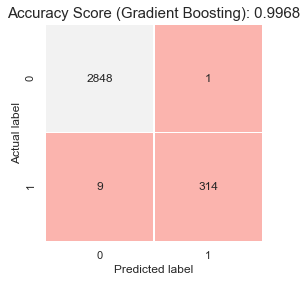

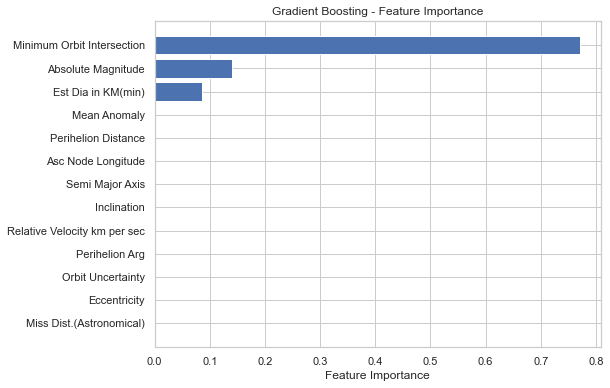

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Predict on the training data
train_y_pred_gb = gb_classifier.predict(X_train)

# Predict on the test data
test_y_pred_gb = gb_classifier.predict(X_test)

# Classification Report for Training Set
train_report_gb = classification_report(y_train, train_y_pred_gb)
print("Training Classification Report (Gradient Boosting):\n", train_report_gb)

# Confusion Matrix for Training Set
train_conf_matrix_gb = confusion_matrix(y_train, train_y_pred_gb)
print("\nTraining Confusion Matrix (Gradient Boosting):")
print(train_conf_matrix_gb)

# Classification Report for Test Set
test_report_gb = classification_report(y_test, test_y_pred_gb)
print("\nTest Classification Report (Gradient Boosting):\n", test_report_gb)

# Confusion Matrix for Test Set
test_conf_matrix_gb = confusion_matrix(y_test, test_y_pred_gb)
print("\nTest Confusion Matrix (Gradient Boosting):")
print(test_conf_matrix_gb)

# Plotting Confusion Matrix for Test Set (Gradient Boosting)
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_gb, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_gb = f'Accuracy Score (Gradient Boosting): {round(accuracy_score(y_test, test_y_pred_gb), 4)}'
plt.title(all_sample_title_gb, size=15)
plt.show()

# Feature Importance Plot
feature_importances_gb = gb_classifier.feature_importances_
sorted_indices_gb = feature_importances_gb.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices_gb)), feature_importances_gb[sorted_indices_gb], align='center')
plt.yticks(range(len(sorted_indices_gb)), X.columns[sorted_indices_gb])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.show()


# Xtreme Gradient Boosting:

Training Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      1.00      1.00      1203

    accuracy                           1.00     12686
   macro avg       1.00      1.00      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (XGBoost):
[[11483     0]
 [    0  1203]]

Test Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       0.99      0.98      0.99       323

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (XGBoost):
[[2847    2]
 [   5  318]]


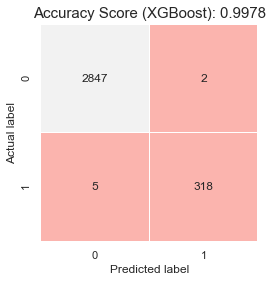

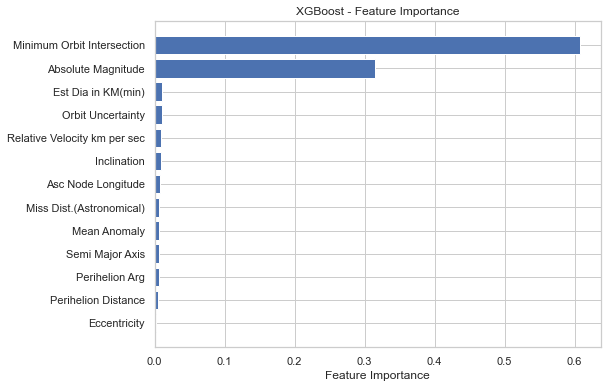

In [56]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Train the XGBoost Classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the training data
train_y_pred_xgb = xgb_classifier.predict(X_train)

# Predict on the test data
test_y_pred_xgb = xgb_classifier.predict(X_test)

# Classification Report for Training Set
train_report_xgb = classification_report(y_train, train_y_pred_xgb)
print("Training Classification Report (XGBoost):\n", train_report_xgb)

# Confusion Matrix for Training Set
train_conf_matrix_xgb = confusion_matrix(y_train, train_y_pred_xgb)
print("\nTraining Confusion Matrix (XGBoost):")
print(train_conf_matrix_xgb)

# Classification Report for Test Set
test_report_xgb = classification_report(y_test, test_y_pred_xgb)
print("\nTest Classification Report (XGBoost):\n", test_report_xgb)

# Confusion Matrix for Test Set
test_conf_matrix_xgb = confusion_matrix(y_test, test_y_pred_xgb)
print("\nTest Confusion Matrix (XGBoost):")
print(test_conf_matrix_xgb)

# Plotting Confusion Matrix for Test Set (XGBoost)
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_xgb, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_xgb = f'Accuracy Score (XGBoost): {round(accuracy_score(y_test, test_y_pred_xgb), 4)}'
plt.title(all_sample_title_xgb, size=15)
plt.show()

# Feature Importance Plot
feature_importances_xgb = xgb_classifier.feature_importances_
sorted_indices_xgb = feature_importances_xgb.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices_xgb)), feature_importances_xgb[sorted_indices_xgb], align='center')
plt.yticks(range(len(sorted_indices_xgb)), X.columns[sorted_indices_xgb])
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.show()


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and test data
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['sqrt', 'log2', None],  # Include 'None' for default behavior
                 'bootstrap': [True, False],
                 'random_state': [42]}

best_accuracy_rf = 0
best_params_rf = None

for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                for max_features in param_grid_rf['max_features']:
                    for bootstrap in param_grid_rf['bootstrap']:
                        for random_state in param_grid_rf['random_state']:
                            params_rf = {
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'bootstrap': bootstrap,
                                'random_state': random_state
                            }

                            rf_model = RandomForestClassifier(**params_rf)
                            rf_model.fit(X_train, y_train)

                            # Evaluate on the test set
                            y_pred_rf = rf_model.predict(X_test)
                            accuracy_rf = accuracy_score(y_test, y_pred_rf)

                            print(f"Parameters (Random Forest): {params_rf}")
                            print(f"Accuracy (Random Forest): {accuracy_rf}")

                            # Update the best parameters if a better model is found
                            if accuracy_rf > best_accuracy_rf:
                                best_accuracy_rf = accuracy_rf
                                best_params_rf = params_rf

print(f"\nBest Parameters (Random Forest): {best_params_rf}")
print(f"Best Accuracy (Random Forest): {best_accuracy_rf}")


Training Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11483
           1       1.00      1.00      1.00      1203

    accuracy                           1.00     12686
   macro avg       1.00      1.00      1.00     12686
weighted avg       1.00      1.00      1.00     12686


Training Confusion Matrix (Random Forest):
[[11483     0]
 [    0  1203]]

Test Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       1.00      0.98      0.99       323

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172


Test Confusion Matrix (Random Forest):
[[2848    1]
 [   5  318]]


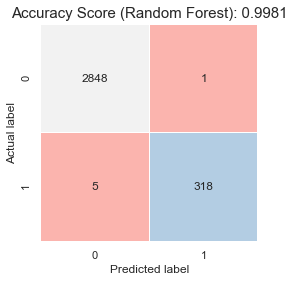

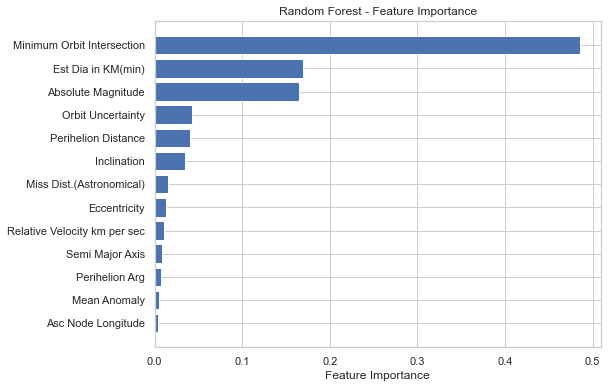

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Parameters={'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42}


# Create a Random Forest model
rf_model = RandomForestClassifier(**Parameters)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training data
train_y_pred_rf = rf_model.predict(X_train)

# Predict on the test data
test_y_pred_rf = rf_model.predict(X_test)

# Classification Report for Training Set
train_report_rf = classification_report(y_train, train_y_pred_rf)
print("Training Classification Report (Random Forest):\n", train_report_rf)

# Confusion Matrix for Training Set
train_conf_matrix_rf = confusion_matrix(y_train, train_y_pred_rf)
print("\nTraining Confusion Matrix (Random Forest):")
print(train_conf_matrix_rf)

# Classification Report for Test Set
test_report_rf = classification_report(y_test, test_y_pred_rf)
print("\nTest Classification Report (Random Forest):\n", test_report_rf)

# Confusion Matrix for Test Set
test_conf_matrix_rf = confusion_matrix(y_test, test_y_pred_rf)
print("\nTest Confusion Matrix (Random Forest):")
print(test_conf_matrix_rf)

# Plotting Confusion Matrix for Test Set (Random Forest)
plt.figure(figsize=(4, 4))
sns.heatmap(test_conf_matrix_rf, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Pastel1',cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_rf = f'Accuracy Score (Random Forest): {round(accuracy_score(y_test, test_y_pred_rf), 4)}'
plt.title(all_sample_title_rf, size=15)
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

In [68]:
df1

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainty,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,18.92,0.437074,16.142863,0.242085,0,0.235633,0.450564,1.058480,16.175350,159.581464,0.581567,191.347330,179.331821,0
1,22.04,0.103886,12.351057,0.481897,0,0.005791,0.269909,0.813511,26.274891,30.452820,0.593937,19.321036,74.589063,1
2,23.90,0.044112,6.220732,0.197817,3,0.033189,0.195681,0.959556,2.183114,251.257621,0.771789,185.760753,203.453042,0
3,23.82,0.045767,22.411064,0.127634,0,0.018672,0.576978,1.212136,3.964751,266.129082,0.512760,88.010827,225.203615,0
4,25.30,0.023150,4.998845,0.096301,2,0.045561,0.057446,1.057926,6.891433,303.638766,0.997152,109.330892,184.381786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,23.02,0.066154,9.775796,0.131984,5,0.122809,0.327498,1.633620,16.672305,273.279488,1.098612,196.966994,116.674983,0
17472,23.98,0.042516,12.269783,0.115776,7,0.092227,0.146745,1.201126,21.582880,272.578603,1.024867,233.449218,159.125584,0
17473,23.83,0.045557,5.807476,0.085148,6,0.054318,0.154055,0.921034,9.330658,104.046221,0.779144,156.218842,127.265813,0
17474,25.12,0.025151,17.632885,0.074527,8,0.050481,0.398112,1.061900,28.435702,91.555474,0.639145,112.323245,294.165138,0


## Conclusion of the Classification Problem
- As we can see, after using multiple predictive models on our dataset, the accuracy is near perfect and this suggests there is a close relationship between some of the features ( observed in the feature importance graph). There are laws of physics for which formulae have been derived by the scientists to establish the relationship between those features.

## Mathematical Relationships in Asteroid Dataset

### Orbital Mechanics
- **Orbital Period and Semi-Major Axis (Kepler's Third Law)**:
  `P^2 = a^3`
  Where `P` is the orbital period in years and `a` is the semi-major axis in astronomical units.

- **Eccentricity (e)**:
  Measure of the orbit's deviation from a perfect circle.

### Absolute Magnitude and Diameter
- **Absolute Magnitude (H)**:
  `H = 5 log10(1329 / (D * sqrt(p)))`
  Where `H` is the absolute magnitude, `D` is the diameter in kilometers, and `p` is the geometric albedo.


The "Minimum Orbit Intersection Distance" (MOID) is a critical parameter in assessing potential asteroid-Earth collisions. The MOID is the shortest distance between the orbits of the Earth and an asteroid. While it's not directly calculable from a simple formula involving other orbital elements in the same way as, for example, Kepler's Third Law for the orbital period, it is related to several factors:

Semi-Major Axis and Eccentricity: These determine the size and shape of the asteroid's orbit. A larger semi-major axis or a more eccentric orbit can lead to a greater variation in MOID over time.

Inclination: The tilt of the asteroid's orbit relative to the plane of Earth's orbit (the ecliptic plane) affects the MOID. A higher inclination can lead to a situation where the orbits intersect at steeper angles, which is important for assessing collision risk.

Node Longitude and Argument of Perihelion: These parameters define the orientation of the orbit in space and its orientation relative to the direction of the perihelion, respectively. They play a role in determining the points at which the two orbits (Earth's and the asteroid's) may come closest to each other.

In practice, calculating the MOID involves complex computational geometry to determine the closest approach points between the two elliptical orbits, taking into account all these orbital elements. It's typically done using numerical methods rather than a straightforward analytical formula.

MOID's importance and its relationship with other orbital parameters as follows:

## Minimum Orbit Intersection Distance (MOID)

The MOID is a crucial parameter in assessing the potential for an asteroid to collide with Earth. It represents the minimum distance between the Earth's orbit and the asteroid's orbit. Key orbital elements related to MOID include:

- **Semi-Major Axis and Eccentricity**: These define the size and shape of the asteroid's orbit, influencing how close it can come to Earth's orbit.
- **Inclination**: The angle of the asteroid's orbit relative to Earth's orbital plane, affecting how orbits intersect.
- **Node Longitude and Argument of Perihelion**: These determine the orientation of the asteroid's orbit in space and relative to its closest approach to the Sun, affecting where the orbits may come closest.

Calculating the MOID involves complex geometry to find the nearest approach points between the elliptical orbits of Earth and the asteroid, considering these orbital elements.


## Calculation of Minimum Orbit Intersection Distance (MOID)

The MOID calculation involves determining the closest approach between the elliptical orbits of Earth and an asteroid. The key orbital elements considered include the semi-major axis, eccentricity, inclination, longitude of the ascending node, and the argument of perihelion.

Conceptually, the MOID is the minimum value of the distance function `d` over time `t`, calculated as:

## Calculation of Minimum Orbit Intersection Distance (MOID)

The MOID is a crucial measure in understanding the potential for close approaches or collisions between Earth and an asteroid. It's calculated as the minimum distance between the orbital paths of Earth and the asteroid.

### Key Orbital Elements
The calculation considers several orbital elements:
- **Semi-Major Axis (a)**: Determines the orbit's size.
- **Eccentricity (e)**: Describes the orbit's shape.
- **Inclination (i)**: The orbit's tilt with respect to a reference plane.
- **Longitude of Ascending Node (Ω)**: The angle from the reference direction to the ascending node.
- **Argument of Perihelion (ω)**: The angle from the ascending node to the closest point to the sun.

### Conceptual Representation
Mathematically, the MOID involves finding the minimum distance between the elliptical orbits. If $$\( \vec{r}_{Earth}(t) \)$$ and $$\( \vec{r}_{Asteroid}(t) \)$$ represent the position vectors of Earth and the asteroid at any time $$\( t \)$$, the MOID 
$$ \text{MOID} = \min_{t} \left\|\vec{r}_{\text{Earth}}(t) - \vec{r}_{\text{Asteroid}}(t)\right\| $$

### Practical Calculation
Due to the elliptical and three-dimensional nature of the orbits, the MOID calculation is complex and typically performed using numerical methods. It involves:
- Computing the orbital paths of Earth and the asteroid.
- Iteratively finding the points on each orbit that minimize the distance.

This calculation is essential for assessing the risk of potential impacts and understanding the dynamics of near-Earth objects.

Machine Learning can be used by scientists to aid them in pursuing questions for which the truth has not been found by Physics yet. By using the different Machine Learning techniques above and if we achieve near perfect performance metrics, it means the scientists can be prompted to pursue a research in that direction. **_ Thus, Machine Learning can be used as an important tool by scientists to seek the undiscovered truth.**

# Regression Problem to Predect Est Dia in KM(min)

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df1.drop(['Est Dia in KM(min)', "Hazardous"], axis=1)  # Features
y = df1['Est Dia in KM(min)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [86]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are your training and testing data
# Replace with your actual variable names

# Instantiate Linear Regression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

# Get the intercept and coefficients
intercept = reg.intercept_
coefficients = reg.coef_


# Print R-squared values, intercept, and coefficients
print("R-squared value for training set:", round(r2_train, 4))
print("R-squared value for testing set:", round(r2_test, 4))
print("Intercept:", intercept)
print("Coefficients:", coefficients)


R-squared value for training set: 0.459
R-squared value for testing set: 0.436
Intercept: 1.640006425696045
Coefficients: [-5.92282311e-02  1.50873292e-03 -1.63355218e-02 -6.46784122e-05
 -1.27721438e-01 -2.68031944e-01  9.71796306e-02 -5.24260146e-04
 -1.46644605e-06 -1.89893087e-01 -1.64395941e-05  2.21953318e-05]


- We can see that linear regression is performing very badly lets try with the bagging classifiers.

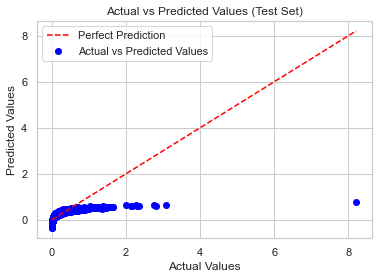

In [87]:
# Predictions for training and testing sets
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

# Get the intercept and coefficients
intercept = reg.intercept_
coefficients = reg.coef_

# Plotting the scatter plot for the test set
plt.scatter(y_test, y_test_predict, color='blue', label='Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', label='Perfect Prediction', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.legend()

# Annotate with R-squared value, intercept, and coefficients
textstr = '\n'.join([
    r'$R^2=%.2f$' % (r2_test,),
    r'Intercept=%.2f' % (intercept,),
    r'Coefficient=%.2f' % (coefficients[0],)  # Assuming a single feature
])

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in the upper left in axes coords

plt.show()


## Decision Tree

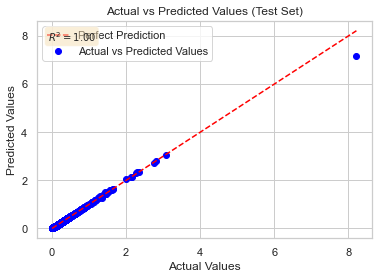

R-squared value for training set: 1.0
R-squared value for testing set: 0.9957


In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are your training and testing data
# Replace with your actual variable names

# Instantiate Decision Tree Regression model
dt_reg = DecisionTreeRegressor()

# Fit the model on the training data
dt_reg.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_predict = dt_reg.predict(X_train)
y_test_predict = dt_reg.predict(X_test)

# Calculate R-squared values
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

# Plotting the scatter plot for the test set
plt.scatter(y_test, y_test_predict, color='blue', label='Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', label='Perfect Prediction', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.legend()

# Annotate with R-squared value
textstr = '\n'.join([
    r'$R^2=%.2f$' % (r2_test,),
])

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in the upper left in axes coords
plt.gcf().text(0.15, 0.85, textstr, fontsize=10, verticalalignment='top', bbox=props)

plt.show()

# Print R-squared values for training and testing sets
print("R-squared value for training set:", round(r2_train, 4))
print("R-squared value for testing set:", round(r2_test, 4))


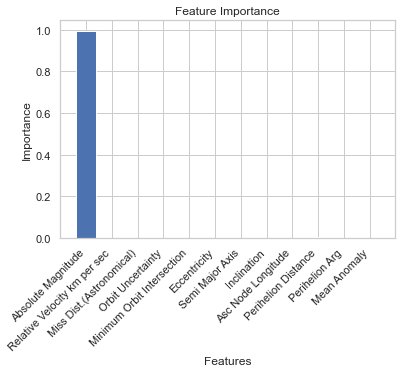

In [89]:
# Plotting feature importance
feature_importance = dt_reg.feature_importances_
features = X_train.columns

plt.bar(features, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha="right")
plt.show()

- There is no need to go any further to apply other algorithms to predict diameter as the decision tree is giving perfect results.
- The reason behind performing extremly well is that the bagging classifier eliminates the linearity problem.
- The reason behind high accuracy is that the data set itself that is from NASA is well cleaned.
- The machine learning algorithm is chasing the underlying physics theory here as we explained in the conclusion of the classification problem.

# Relative Velocity Prediction

In [90]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df1.drop(['Relative Velocity km per sec','Hazardous'], axis=1)  # Features
y = df1['Relative Velocity km per sec']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [91]:
# Importing 'LinearRegression' through linear_model module, importing r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Instantiate the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predictions on both training and testing sets
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

# R-squared value for training set
r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared (Training Set): {r2_train}')

# R-squared value for testing set
r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared (Testing Set): {r2_test}')


R-squared (Training Set): 0.6355803125840693
R-squared (Testing Set): 0.6361913711298435


## Random Forest Regressor

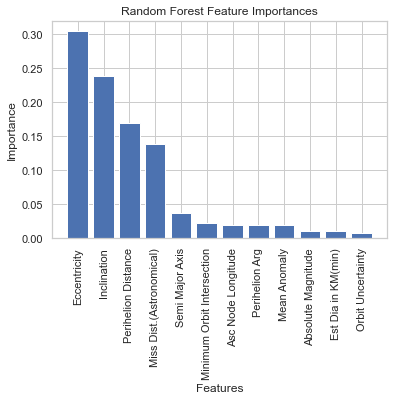

In [92]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Instantiate the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Feature importances
feature_importances = random_forest_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [94]:

# Predictions on both training and testing sets
y_train_pred_rf = random_forest_model.predict(X_train)
y_test_pred_rf = random_forest_model.predict(X_test)

# R-squared value for training set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f'R-squared (Training Set - Random Forest): {r2_train_rf}')

# R-squared value for testing set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f'R-squared (Testing Set - Random Forest): {r2_test_rf}')


R-squared (Training Set - Random Forest): 0.9620646414537427
R-squared (Testing Set - Random Forest): 0.736681685770699


- In the Random Forest Regressor, we see that the features that have more impact on the prediction are Eccentricity, Inclination, Perihelion Distance and Miss Distance (Astronomical). There are some other features which have less importance. 
- This model gives us an R squared score of 73.66% which is a leap from the 63.61% that was achieved by the Linear Regression model.
- Thus the Random Forest Regressor is much more optimised for predicting the Relative Velocity.